In [3]:
from pathlib import Path
from radiens import VidereClient, CurateClient, FileSystemClient


### Initialize clients

In [4]:
videre = VidereClient()
curate = CurateClient()
fsys = FileSystemClient()

### List directory

In [6]:
data_path = "D:/Spike_CSD_Analysis/Data" #~/radix/data
spike_files = fsys.list_dir(data_path)
spike_files

,path,base_name,type,dataset_uid,num_files,bytes_primary_data,bytes_meta_data,bytes_total,timestamp,num_chan,dur_sec,samp_freq,checksum,provenance
0,D:\Spike_CSD_Analysis\Data,MWT16_03_Spikes_s0,spikes,d8dd8b06-d4c5-4ad8-a05e-d22c880a2371,2,43301062,210066,43511128,2024-03-12 23:25:01,32,447.325867,30000,0,"[679822e5-df0b-4d83-9944-49c229be0cf0, My New ..."
1,D:\Spike_CSD_Analysis\Data\,MWT16_03_Spikes,xdat,ed185c6d-a614-4d7d-a914-1e4ffef40165,3,2147164160,64040,2147228200,2024-03-12 23:25:01,38,447.325867,30000,80e1102b6d3add6d1f3f5bde7c03a6d525c6b584d0de4b...,"[679822e5-df0b-4d83-9944-49c229be0cf0, My New ..."


In [7]:
cont_data_bname = "MWT16_03_Spikes"
spike_data_bname = "MWT16_03_Spikes_s0"

cont_data_path = Path(data_path, cont_data_bname).expanduser().resolve()
spike_data_save_path = Path(data_path, spike_data_bname).expanduser().resolve()

In [8]:
# link the client to continuous data
cont_file_meta = videre.link_data_file(cont_data_path, calc_metrics=False, force=False)
spk_file_meta = videre.link_data_file(spike_data_save_path, calc_metrics=False, force=False)

### Getting spikes

In [16]:
from radiens.utils.util import make_time_range

tr = make_time_range( time_range=[1000, 1010], fs=cont_file_meta.TR.fs)

# get spikes
spike_timestamps = videre.spikes().get_spike_timestamps(
    spike_data_bname, time_range=tr)

# get waveforms
spike_wavefoms = videre.spikes().get_spike_waveforms(spike_data_bname, time_range=tr)

### Example: plot all spikes on a channel

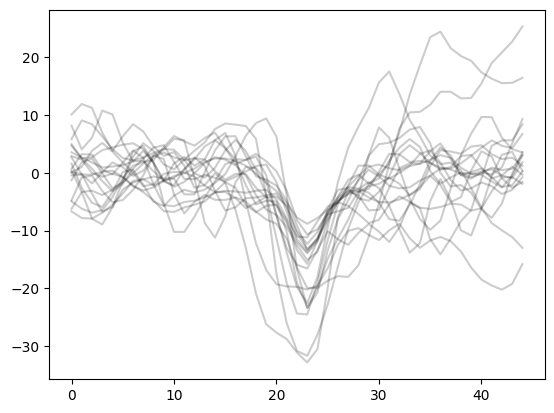

In [17]:
from matplotlib import pyplot as plt

plt.plot(spike_wavefoms[spike_timestamps['dset_idxs']==1, :].T, 'k', alpha=0.2);